# Imports

In [1]:
import os
import errno
from importlib import reload

import pickle 
from pprint import pprint
from itertools import product, combinations_with_replacement
from glob import glob
from os.path import basename, splitext, split, exists, join, isfile
from json import dump, load
from collections import Counter
from math import lgamma, log, factorial

import pandas as pd
from scipy import stats
import scipy as sp
import numpy as np

from scipy.special import beta, binom
from itertools import product

import matplotlib.pyplot as plt
import matplotlib
# just so saved plots aren't also shown
matplotlib.use('Agg')
%matplotlib inline
import seaborn as sns

import pymc3 as pm
import theano as T
import theano.tensor as tt
import arviz as az
import xarray as xr

In [2]:
from functions.data_functions import get_and_clean_data_exp2
from functions.models_variablearray import *
from functions.helper_functions import get_traces

In [3]:
# packages versions
print(
    '\n'.join(
        f'{m.__name__}=={m.__version__}' 
        for m in globals().values() 
        if getattr(m, '__version__', None)
    )
)

pandas==1.5.2
scipy==1.10.1
numpy==1.21.5
matplotlib==3.7.0
seaborn==0.11.2
pymc3==3.11.4
theano==1.1.2
arviz==0.14.0
xarray==2023.1.0


> NOTE: Compare fails depending on the arviz version. Try:
>
> ```mamba install -c conda-forge arviz==0.14.0```
>
> Also, there's another bug so run:
>
> ```mamba  install hdf5=1.12.1```
>
> You might also need to face a bug with crypt.h when running models.
>
> I solved it brutally with:
> ```cp /usr/include/crypt.h /home/fausto/anaconda3/envs/argumentative_language/include/python3.8/```

# Get experiment data

In [4]:
folder_exp2_traces = '../../arglang_model_fitting/experiment2_traces'
# where to store the argstrengths, since some of them take a while to compute
# (namely, the ones with full state space)
path_to_argstrengths_folder = './argstrengths/'
folder_exp2_cleaned_data = '../data/data_experiment2/'

In [5]:
folder_exp1_data = '../../arglang_exp/data_experiment1/data.csv'
folder_exp2_data = '../../arglang_exp/data_experiment2/data.csv'

In [6]:
exp1and2_data = get_and_clean_data_exp2(
    pathdata_firstexp=folder_exp1_data,
    pathdata=folder_exp2_data
)
_, data, list_possible_observations, possible_utterances = exp1and2_data

0  were excluded because incompletely recorded
14  of the participants were excluded as they gave more than 4 false responses
113  of the observations in the included participants were excluded because literally false


In [7]:
if exists(folder_exp2_data):
    exp1and2_data = get_and_clean_data_exp2(
        pathdata_firstexp=folder_exp1_data,
        pathdata=folder_exp2_data
    )
    _, data, list_possible_observations, possible_utterances = exp1and2_data
    data.to_csv(join(folder_exp2_cleaned_data, 'cleaned_data_1and2.csv'), index=False)
    with open(join(folder_exp2_cleaned_data, 'obs_1and2.json'),'w') as openfile:
        dump([x.tolist() for x in list_possible_observations], openfile)
    pd.DataFrame(possible_utterances).to_csv(join(folder_exp2_cleaned_data, 'utts.csv'), index=False)
else:
    # read the pre-cleaned data
    data = pd.read_csv(join(folder_exp2_cleaned_data, 'cleaned_data_1and2.csv'))
    list_possible_observations = pd.read_json(join(folder_exp2_cleaned_data, 'obs_1and2.json')).to_numpy()
    with open(join(folder_exp2_cleaned_data, 'obs_1and2.json'), 'r') as openfile:
        y = load(openfile)
    list_possible_observations = [np.array(x) for x in y]
    possible_utterances = pd.read_csv(join(folder_exp2_cleaned_data, 'utts.csv')).to_numpy()

0  were excluded because incompletely recorded
14  of the participants were excluded as they gave more than 4 false responses
113  of the observations in the included participants were excluded because literally false


In [8]:
# Participants remaining after exclusion
data['id'].unique().shape

(186,)

# Define models

In [9]:
model_base = factory_model_base(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [10]:
model_base_hierarchical = factory_model_base_hierarchical(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model


In [11]:
model_lr_argstrength = factory_model_lr_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [12]:
model_lr_argstrength_hierarchical = factory_model_lr_argstrength_hierarchical(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model


In [13]:
model_maximin_argstrength = factory_model_maximin_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances
)

/mnt/c/Users/faust/OneDrive - UvA/research_projects/2022_arglang/arglang_modelling/analysis/functions/argstrengths.py:148: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [14]:
model_maximin_argstrength_hierarchical = factory_model_maximin_argstrength_hierarchical(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model


In [15]:
model_prag_argstrength = factory_model_prag_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [16]:
model_prag_argstrength_hierarchical = factory_model_prag_argstrength_hierarchical(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model


In [17]:
model_nonparametric_argstrength = factory_model_nonparametric_argstrength(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model


In [18]:
model_nonparametric_argstrength_hierarchical = factory_model_nonparametric_argstrength_hierarchical(
    data, 
    list_possible_observations, 
    possible_utterances
)

Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model
Defining hierarchical model


# Fit models (if not stored yet)

## Base RSA

**Completely pooled $\alpha$**

In [12]:
with model_base:
    trace_base = pm.sample(
        draws=1000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


/tmp/ipykernel_1015/2417821980.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


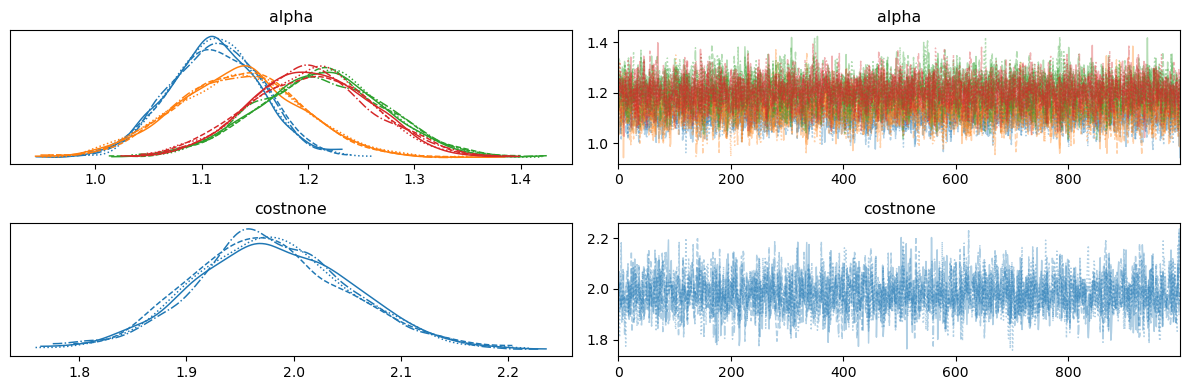

In [144]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_base)
plt.tight_layout()
plt.show()

In [124]:
save_trace(
    'base', 
    trace_base,
    path_to_folder=folder_exp2_traces
)

**By-participant $\alpha$**

In [41]:
with model_base_hierarchical:
    trace_base_hierarchical = pm.sample(
        draws=1000,
        tune=1000,
        # target_accept=0.99,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, alpha_zs, alpha_sigma, alpha_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 863 seconds.


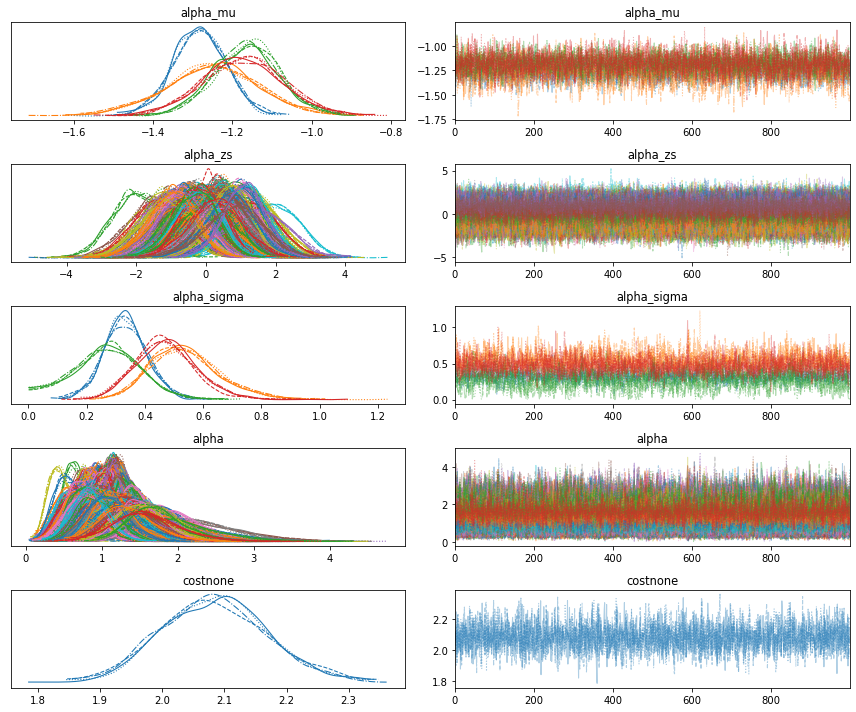

In [42]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_base_hierarchical)
plt.tight_layout()
plt.show()

In [43]:
save_trace(
    'base_hierarchical', 
    trace_base_hierarchical,
    path_to_folder=folder_exp2_traces
)

## Log-likelihood ratio argstrength RSA

**Completely pooled $\alpha$ and $\beta$**

In [128]:
with model_lr_argstrength:
    trace_lr_argstrength = pm.sample(
        draws=1000,
        tune=1000,
        # target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 178 seconds.


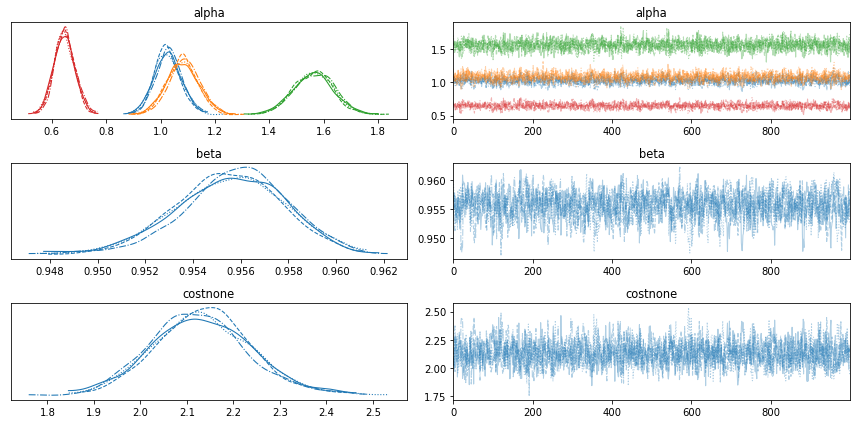

In [129]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_lr_argstrength)
plt.tight_layout()
plt.show()

In [130]:
save_trace(
    'lr_argstrength', 
    trace_lr_argstrength,
    path_to_folder=folder_exp2_traces
)

**By-participant $\alpha$, $\beta$**

In [48]:
with model_lr_argstrength_hierarchical:
    trace_lr_argstrength_hierarchical = pm.sample(
        draws=1000,
        # tune=1000,
        # target_accept=0.99,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta_offset, beta_sigma, beta_mu, alpha_zs, alpha_sigma, alpha_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2743 seconds.
The number of effective samples is smaller than 25% for some parameters.


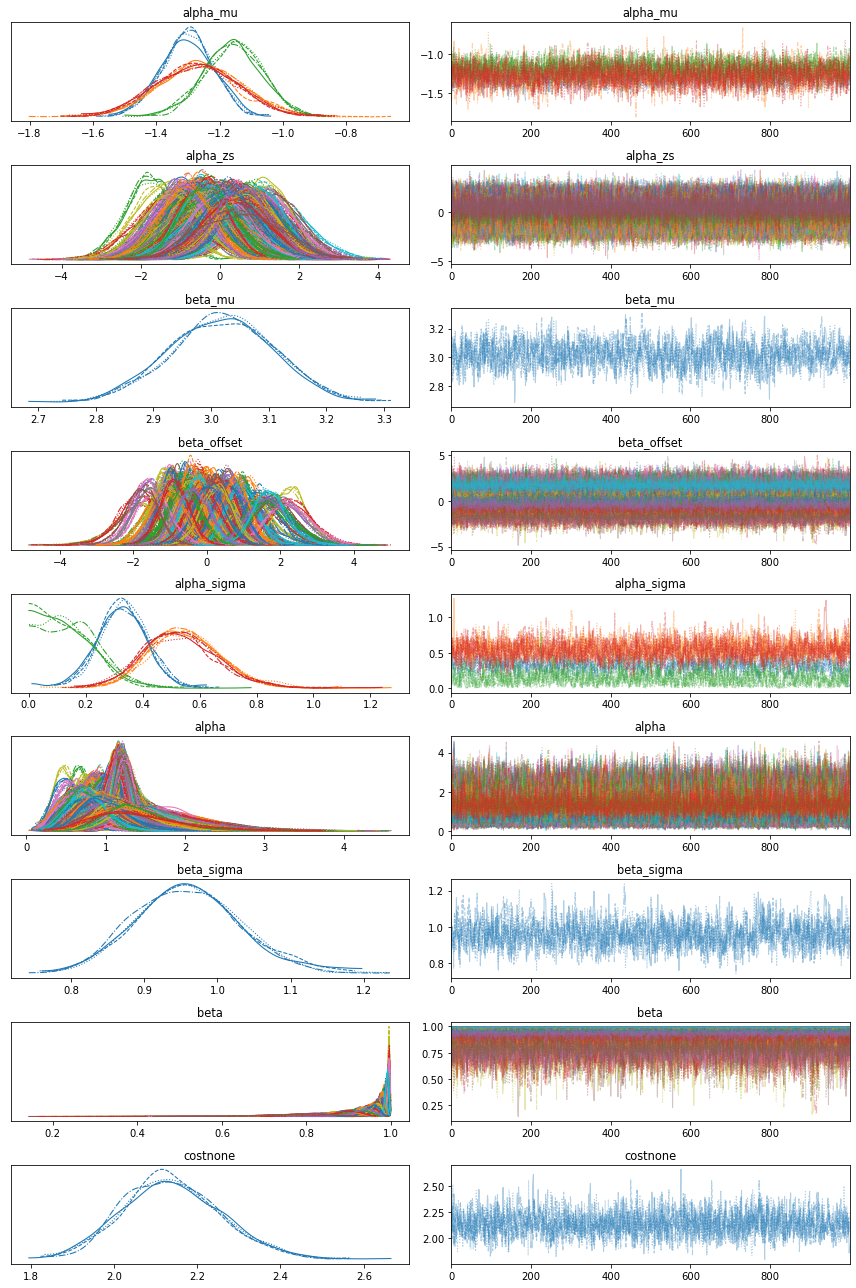

In [49]:
az.plot_trace(trace_lr_argstrength_hierarchical)
plt.tight_layout()
plt.show()

In [52]:
save_trace(
    'lr_argstrength_hierarchical', 
    trace_lr_argstrength_hierarchical,
    path_to_folder=folder_exp2_traces
)

## Maximin argstrength RSA

**Completely pooled $\alpha$ and $\beta$**

In [132]:
with model_maximin_argstrength:
    trace_maximin_argstrength = pm.sample(
        draws=3000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 854 seconds.
The number of effective samples is smaller than 10% for some parameters.


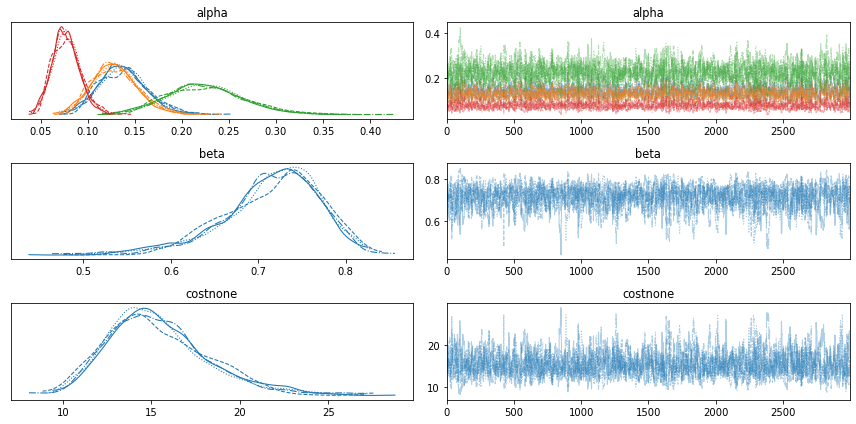

In [133]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_maximin_argstrength)
plt.tight_layout()
plt.show()

In [134]:
save_trace(
    'maximin_argstrength', 
    trace_maximin_argstrength,
    path_to_folder=folder_exp2_traces
)

**By-participant $\alpha$, $\beta$**

In [104]:
with model_maximin_argstrength_hierarchical:
    trace_maximin_argstrength_hierarchical = pm.sample(
        draws=1000,
        tune=1000,
        # target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta_offset, beta_sigma, beta_mu, alpha_zs, alpha_sigma, alpha_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6332 seconds.
The number of effective samples is smaller than 10% for some parameters.


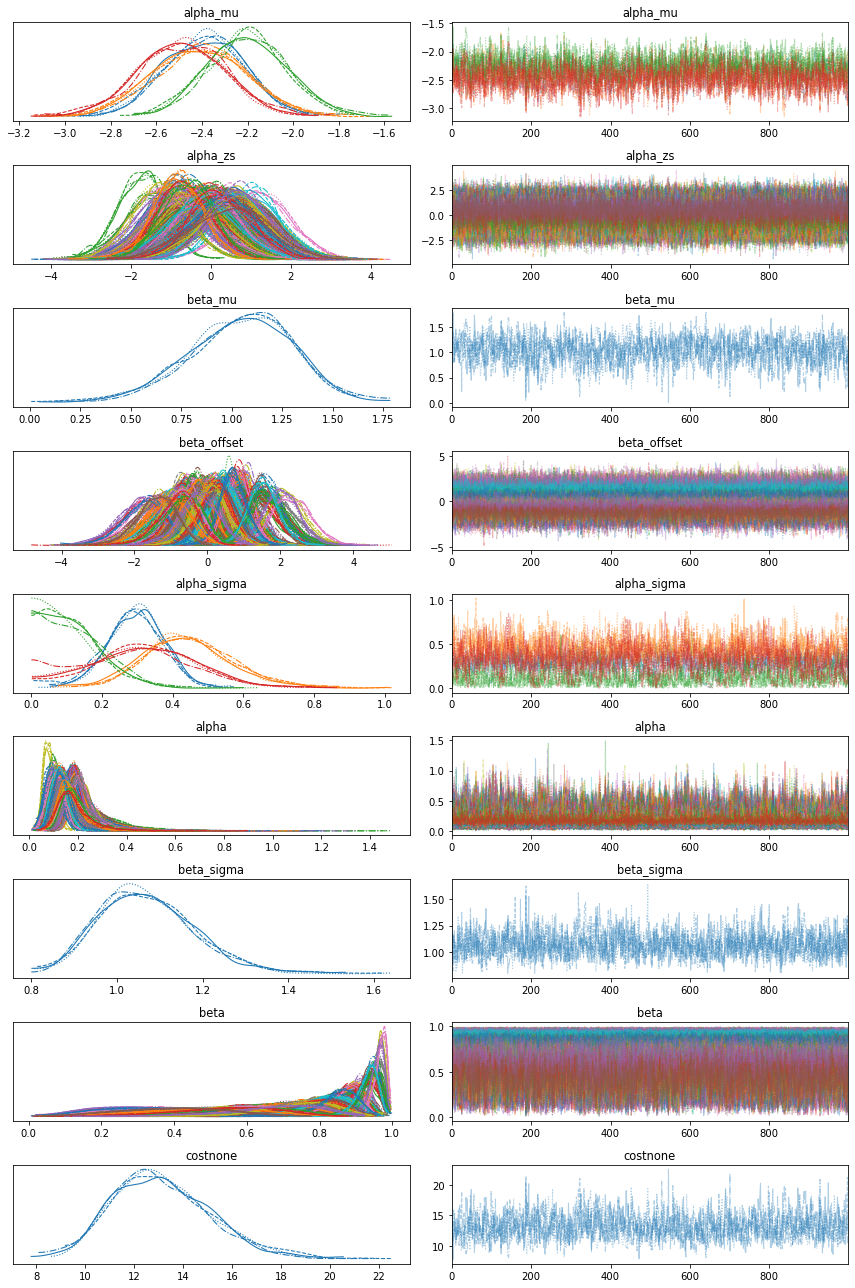

In [105]:
az.plot_trace(trace_maximin_argstrength_hierarchical)
plt.tight_layout()
plt.show()

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

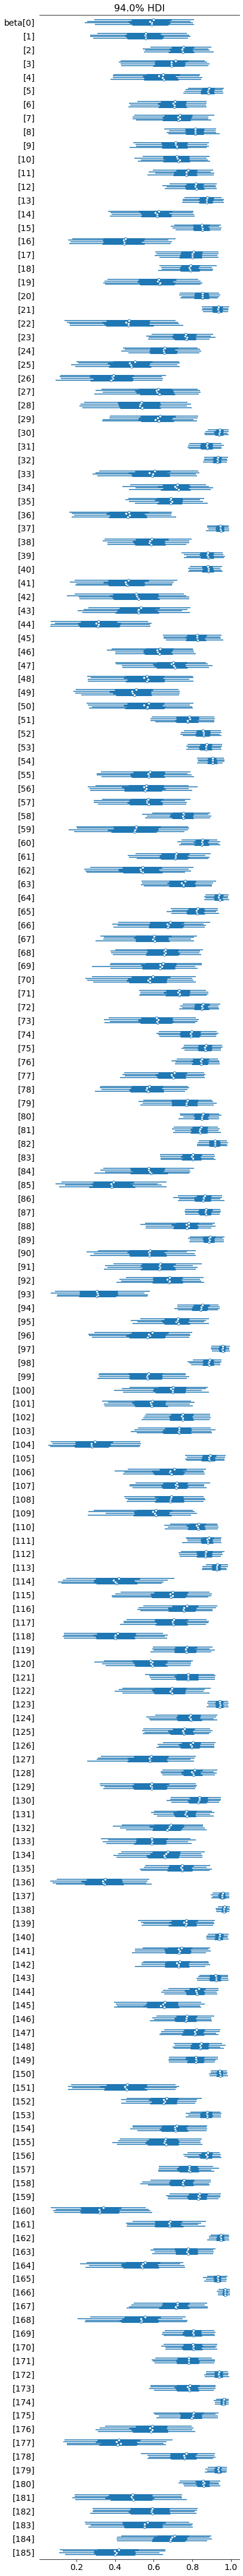

In [106]:
az.plot_forest(
    trace_maximin_argstrength_hierarchical, 
    var_names=['beta']
)

In [108]:
save_trace(
    'maximin_argstrength_hierarchical', 
    trace_maximin_argstrength_hierarchical,
    path_to_folder=folder_exp2_traces
)

## $S_1$ argstrength

**Completely pooled $\alpha$ and $\beta$**

In [ ]:
with model_prag_argstrength:
    trace_prag_argstrength = pm.sample(
        draws=3000,
        tune=2000,
        target_accept=0.95,
        return_inferencedata=True
    )

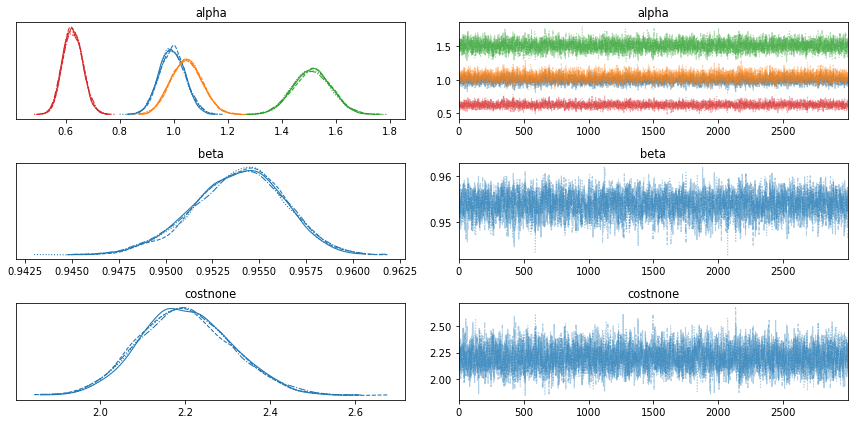

In [137]:
az.plot_trace(trace_prag_argstrength)
plt.tight_layout()

In [138]:
save_trace(
    'prag_argstrength', 
    trace_prag_argstrength,
    path_to_folder=folder_exp2_traces
)

**By-participant $\alpha$ and $\beta$**

In [82]:
with model_prag_argstrength_hierarchical:
    trace_prag_argstrength_hierarchical = pm.sample(
        # draws=3000,
        # tune=2000,
        # target_accept=0.99,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta_offset, beta_sigma, beta_mu, alpha_zs, alpha_sigma, alpha_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4284 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


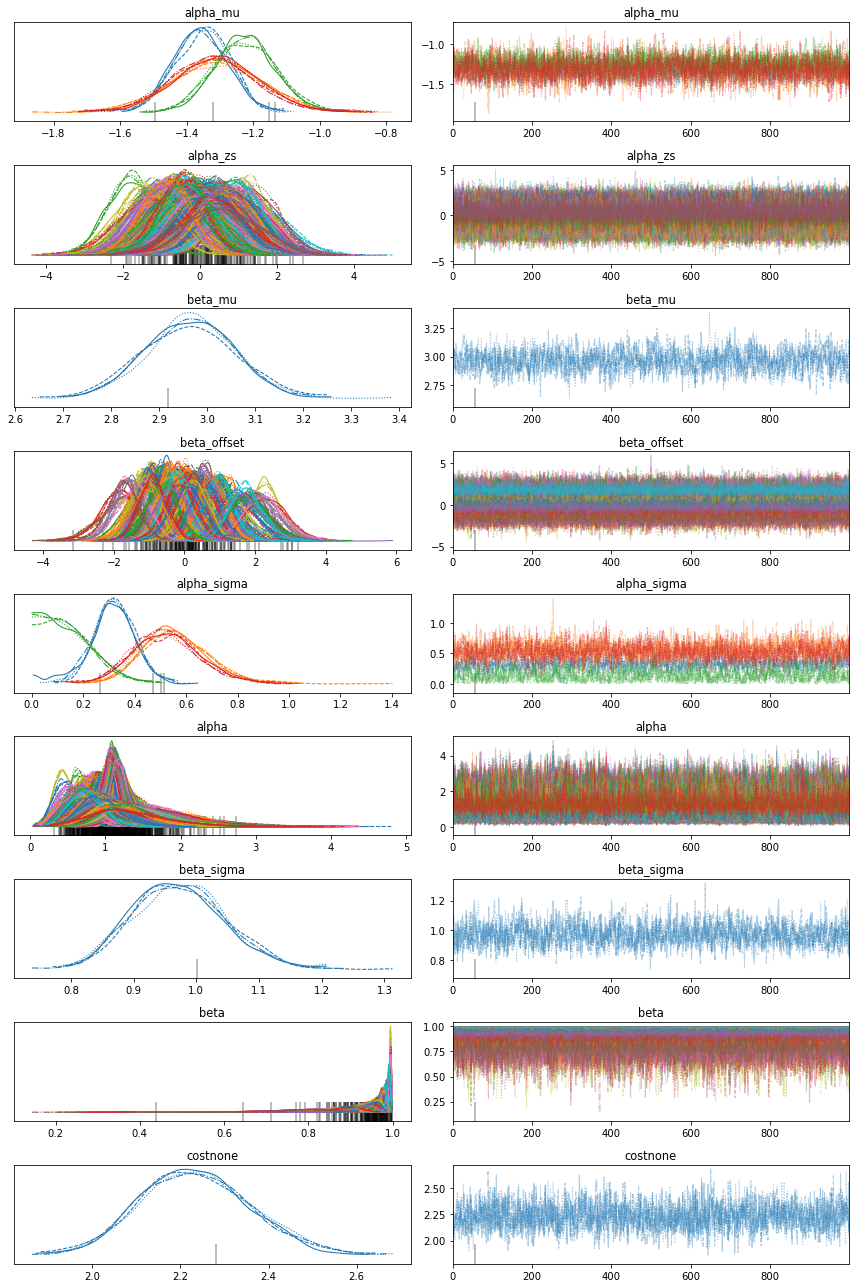

In [83]:
az.plot_trace(trace_prag_argstrength_hierarchical)
plt.tight_layout()

In [84]:
save_trace(
    'prag_argstrength_hierarchical', 
    trace_prag_argstrength_hierarchical,
    path_to_folder=folder_exp2_traces
)

## Nonparametric argstrength RSA

**Completely pooled $\alpha$ and $\beta$**

In [140]:
with model_nonparametric_argstrength:
    trace_nonparametric_argstrength = pm.sample(
        draws=1000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 280 seconds.
The number of effective samples is smaller than 25% for some parameters.


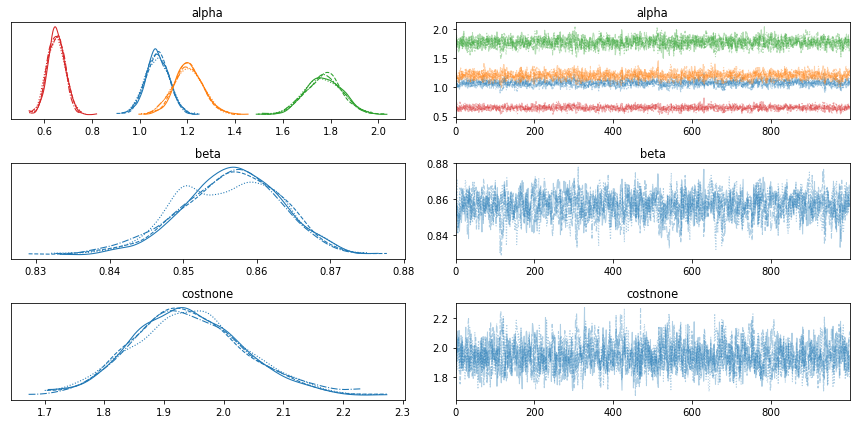

In [141]:
# run with argument strength calculated just using
# the possible observations in the experiment
az.plot_trace(trace_nonparametric_argstrength)
plt.tight_layout()
plt.show()

In [142]:
save_trace(
    'nonparametric_argstrength', 
    trace_nonparametric_argstrength,
    path_to_folder=folder_exp2_traces
)

**By-participant $\alpha$, $\beta$**

In [86]:
with model_nonparametric_argstrength_hierarchical:
    trace_nonparametric_argstrength_hierarchical = pm.sample(
        # draws=2000,
        # tune=2000,
        # target_accept=0.99,
        return_inferencedata=True,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [costnone, beta_offset, beta_sigma, beta_mu, alpha_zs, alpha_sigma, alpha_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3257 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


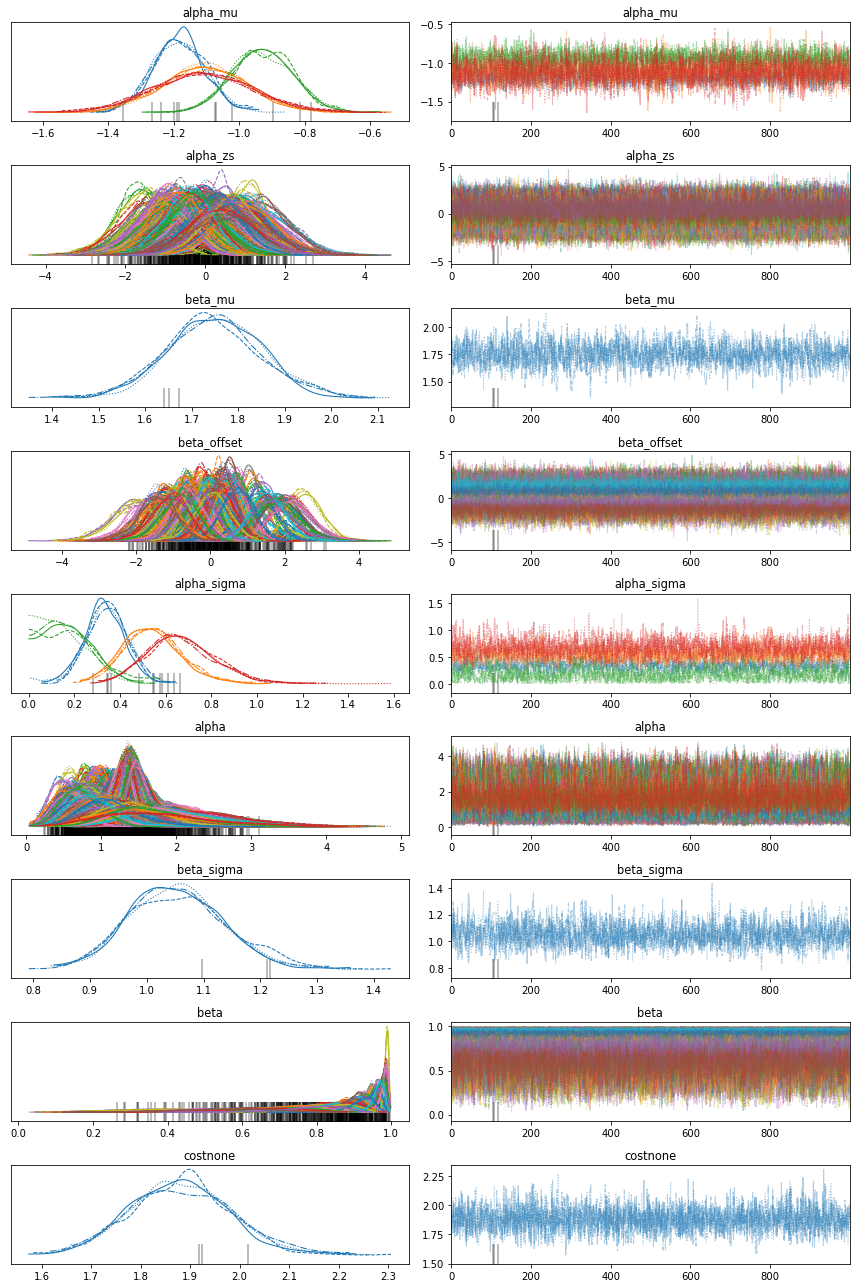

In [87]:
az.plot_trace(trace_nonparametric_argstrength_hierarchical)
plt.tight_layout()
plt.show()

In [90]:
save_trace(
    'nonparametric_argstrength_hierarchical', 
    trace_nonparametric_argstrength_hierarchical,
    path_to_folder=folder_exp2_traces
)

# Get stored traces (after fitting)

In [19]:
exp2_traces = get_traces(folder_exp2_traces)

Getting  base
Objects for base not yet defined, attempting from file
Objects for base loaded from file

Getting  base_hierarchical
Objects for base_hierarchical not yet defined, attempting from file
Objects for base_hierarchical loaded from file

Getting  base_narrowLong
Objects for base_narrowLong not yet defined, attempting from file
Objects for base_narrowLong loaded from file

Getting  base_narrowShort
Objects for base_narrowShort not yet defined, attempting from file
Objects for base_narrowShort loaded from file

Getting  base_wideLong
Objects for base_wideLong not yet defined, attempting from file
Objects for base_wideLong loaded from file

Getting  base_wideShort
Objects for base_wideShort not yet defined, attempting from file
Objects for base_wideShort loaded from file

Getting  lr_argstrength
Objects for lr_argstrength not yet defined, attempting from file
Objects for lr_argstrength loaded from file

Getting  lr_argstrength_hierarchical
Objects for lr_argstrength_hierarchical 

In [20]:
{k:v.observed_data.utterances_dim_0.values.shape for k,v in exp2_traces.items()}

{'base': (3607,),
 'base_hierarchical': (3607,),
 'base_narrowLong': (676,),
 'base_narrowShort': (700,),
 'base_wideLong': (759,),
 'base_wideShort': (1472,),
 'lr_argstrength': (3607,),
 'lr_argstrength_hierarchical': (3607,),
 'lr_argstrength_narrowLong': (676,),
 'lr_argstrength_narrowShort': (700,),
 'lr_argstrength_wideLong': (759,),
 'lr_argstrength_wideShort': (1472,),
 'maximin_argstrength': (3607,),
 'maximin_argstrength_hierarchical': (3607,),
 'maximin_argstrength_narrowLong': (676,),
 'maximin_argstrength_narrowShort': (700,),
 'maximin_argstrength_wideLong': (759,),
 'maximin_argstrength_wideShort': (1472,),
 'nonparametric_argstrength': (3607,),
 'nonparametric_argstrength_hierarchical': (3607,),
 'nonparametric_argstrength_narrowLong': (676,),
 'nonparametric_argstrength_narrowShort': (700,),
 'nonparametric_argstrength_wideLong': (759,),
 'nonparametric_argstrength_wideShort': (1472,),
 'prag_argstrength': (3607,),
 'prag_argstrength_hierarchical': (3607,),
 'prag_args

In [21]:
trace_base = exp2_traces['base']
trace_base_hierarchical = exp2_traces['base_hierarchical']
trace_lr_argstrength = exp2_traces['lr_argstrength']
trace_lr_argstrength_hierarchical = exp2_traces['lr_argstrength_hierarchical']
trace_maximin_argstrength = exp2_traces['maximin_argstrength']
trace_maximin_argstrength_hierarchical = exp2_traces['maximin_argstrength_hierarchical']
trace_nonparametric_argstrength = exp2_traces['nonparametric_argstrength']
trace_nonparametric_argstrength_hierarchical = exp2_traces['nonparametric_argstrength_hierarchical']
trace_prag_argstrength = exp2_traces['prag_argstrength']
trace_prag_argstrength_hierarchical = exp2_traces['prag_argstrength_hierarchical']

# Plot posterior predictive samples

## Calculate and store posterior predictive samples (if not done yet)

Check `./posterior_predictive_samples` to see if samples have already been saved

In [28]:
utterances_names = np.apply_along_axis(
    lambda x: '|'.join(np.array(x).astype(str)),
    1,
    possible_utterances
)

In [29]:
with model_base_hierarchical:
    pps_base_hierarchical = pm.sample_posterior_predictive(
        trace_base_hierarchical
    )

pps_base_hierarchical = (
    pd.DataFrame(pps_base_hierarchical['utterances'].T)
    .apply(pd.value_counts, axis=1, normalize=True)
    .fillna(0)
    .rename(columns=pd.Series(utterances_names))
)

In [30]:
with model_lr_argstrength_hierarchical:
    pps_lr_argstrength_hierarchical = pm.sample_posterior_predictive(
        trace_lr_argstrength_hierarchical
    )

# go from pure predictions to predicted proportion of
# each utterance in each condition
pps_lr_argstrength_hierarchical = (
    pd.DataFrame(pps_lr_argstrength_hierarchical['utterances'].T)
    .apply(pd.value_counts, axis=1, normalize=True)
    .fillna(0)
    .rename(columns=pd.Series(utterances_names))
)

In [31]:
with model_prag_argstrength_hierarchical:
    pps_prag_argstrength_hierarchical = pm.sample_posterior_predictive(
        trace_prag_argstrength_hierarchical
    )

pps_prag_argstrength_hierarchical = (
    pd.DataFrame(pps_prag_argstrength_hierarchical['utterances'].T)
    .apply(pd.value_counts, axis=1, normalize=True)
    .fillna(0)
    .rename(columns=pd.Series(utterances_names))
)

In [32]:
with model_maximin_argstrength_hierarchical:
    pps_maximin_argstrength_hierarchical = pm.sample_posterior_predictive(
        trace_maximin_argstrength_hierarchical
    )

pps_maximin_argstrength_hierarchical = (
    pd.DataFrame(pps_maximin_argstrength_hierarchical['utterances'].T)
    .apply(pd.value_counts, axis=1, normalize=True)
    .fillna(0)
    .rename(columns=pd.Series(utterances_names))
)

In [33]:
# For each datapoint (participant in trial)
# the ppc have a possible sampled utterance

with model_nonparametric_argstrength_hierarchical:
    pps_nonparametric_argstrength_hierarchical = pm.sample_posterior_predictive(
        trace_nonparametric_argstrength_hierarchical
    )
    

pps_nonparametric_argstrength_hierarchical = (
    pd.DataFrame(pps_nonparametric_argstrength_hierarchical['utterances'].T)
    .apply(pd.value_counts, axis=1, normalize=True)
    .fillna(0)
    .rename(columns=pd.Series(utterances_names))
)

In [34]:
# save pps
pps_base_hierarchical.to_csv('posterior_predictive_samples/pps_base_hierarchical.csv')
pps_lr_argstrength_hierarchical.to_csv('posterior_predictive_samples/pps_lr_argstrength_hierarchical.csv')
pps_prag_argstrength_hierarchical.to_csv('posterior_predictive_samples/pps_prag_argstrength_hierarchical.csv')
pps_maximin_argstrength_hierarchical.to_csv('posterior_predictive_samples/pps_maximin_argstrength_hierarchical.csv')
pps_nonparametric_argstrength_hierarchical.to_csv('posterior_predictive_samples/pps_nonparametric_argstrength_hierarchical.csv')


## Load and plot pps

In [24]:
# load pps
# careful about index column!
pps_base_hierarchical = pd.read_csv('posterior_predictive_samples/pps_base_hierarchical.csv', index_col=0)
pps_lr_argstrength_hierarchical = pd.read_csv('posterior_predictive_samples/pps_lr_argstrength_hierarchical.csv', index_col=0)
pps_prag_argstrength_hierarchical = pd.read_csv('posterior_predictive_samples/pps_prag_argstrength_hierarchical.csv', index_col=0)
pps_maximin_argstrength_hierarchical = pd.read_csv('posterior_predictive_samples/pps_maximin_argstrength_hierarchical.csv', index_col=0)
pps_nonparametric_argstrength_hierarchical = pd.read_csv('posterior_predictive_samples/pps_nonparametric_argstrength_hierarchical.csv', index_col=0)


In [25]:
data['observation'] = data['row_number'].apply(lambda x: '|'.join(np.array(x).astype(str)))
data['utterance'] = data['response'].apply(lambda x: '|'.join(x))

In [ ]:
for i, (((obs, cond, arrsizecond), inds)) in enumerate(data.groupby(['observation', 'condition', 'array_size_condition']).indices.items()):

    y = (
        data
        .iloc[inds]
        ['utterance']
        .value_counts(normalize=True)
    )

    x_base = (
        pps_base_hierarchical
        .iloc[inds]
        .mean(0)
    )
    
    x_lr = (
        pps_lr_argstrength_hierarchical
        .iloc[inds]
        .mean(0)
    )

    x_prag = (
        pps_prag_argstrength_hierarchical
        .iloc[inds]
        .mean(0)
    )
    
    x_nonparametric = (
        pps_nonparametric_argstrength_hierarchical
        .iloc[inds]
        .mean(0)
    )
    
    x_maximin = (
        pps_maximin_argstrength_hierarchical
        .iloc[inds]
        .mean(0)
    )
        
    toplot = (
        pd.concat(
            (x_base, x_lr, x_prag, x_nonparametric,x_maximin,y), 
            keys=['base (mean)', 'lr (mean)', 'prag (mean)', 'nonparametric (mean)', 'maximin (mean)', 'observed'],
            axis=0
        )
        .reset_index()
    )
    
    toplot_nonzero = toplot[toplot[0] > 0]
    
    order_to_plot = (
        toplot_nonzero
        .groupby('level_1')
        .mean(numeric_only=True)
        .sort_values(0)
        .index
    )
    
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(
        data=toplot_nonzero,
        hue='level_0',
        x='level_1',
        y=0,
        order=order_to_plot,
        ax=ax
    ) 
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(f'Observation: {obs}\nCondition: {"high" if cond else "low"}')
    ax.set_xlabel('Utterance')
    ax.set_ylabel('Probs')
    ax.set_ylim(0,1)
    fig.patch.set_facecolor('white')

    plt.tight_layout()
    
    fig.savefig(f'./figs/ppc_all_models/{arrsizecond}_{obs.replace("|", "-")}_{"high" if cond else "low"}.png', dpi=300)
    plt.close(fig=fig)
    print(i, end=' ')

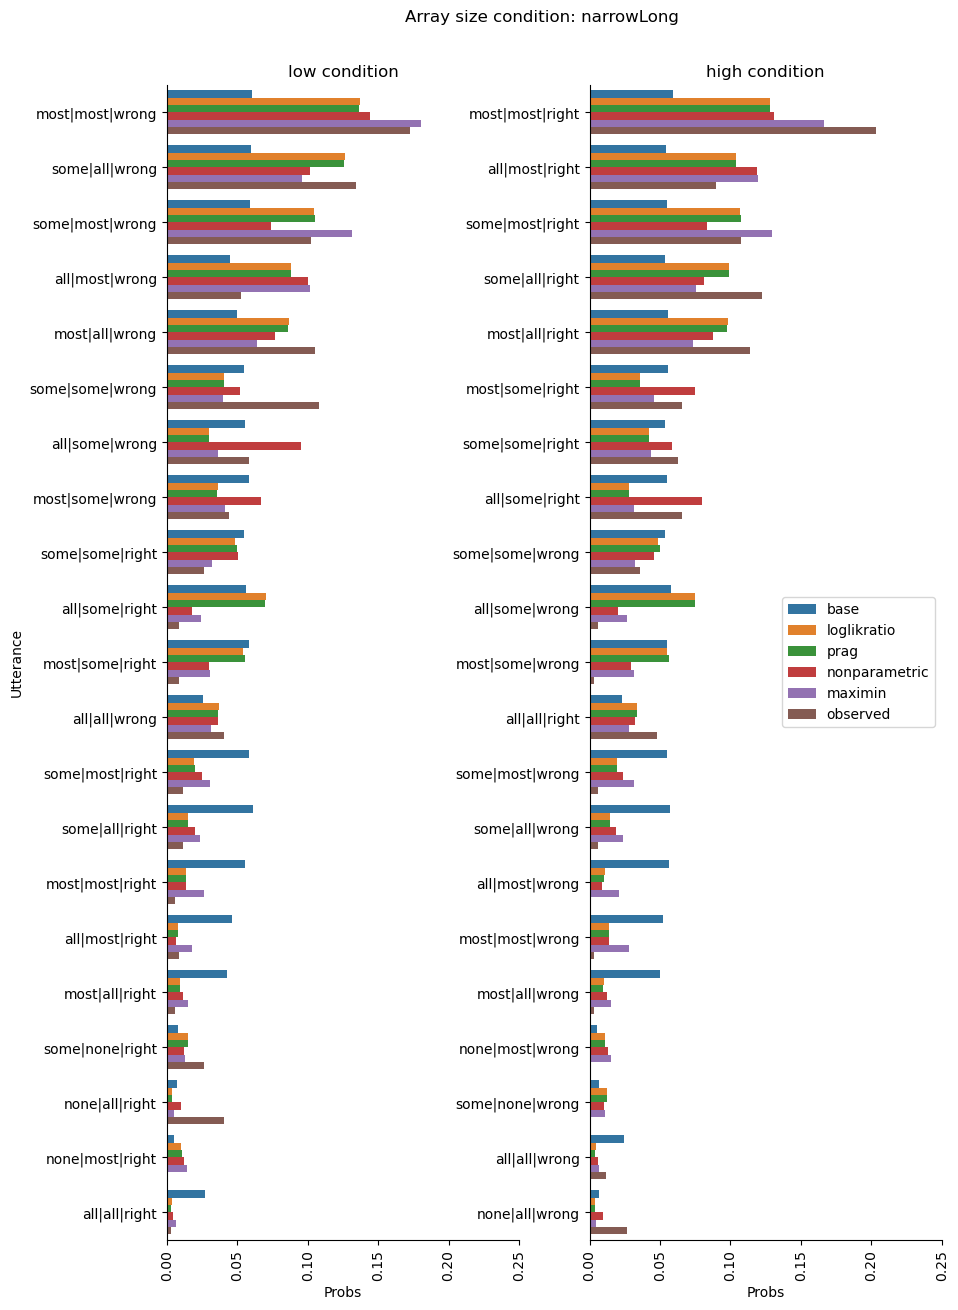

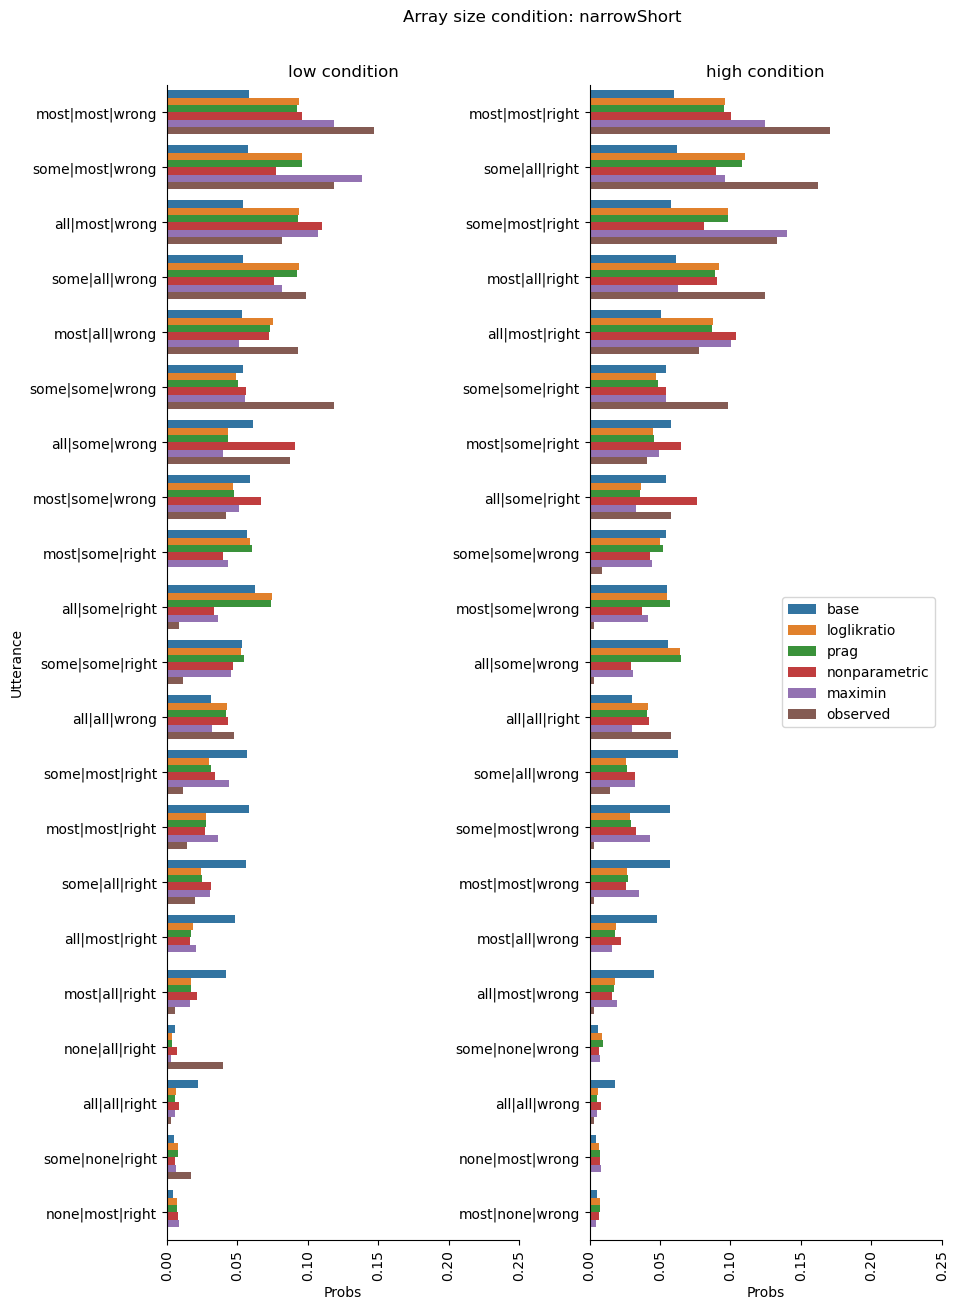

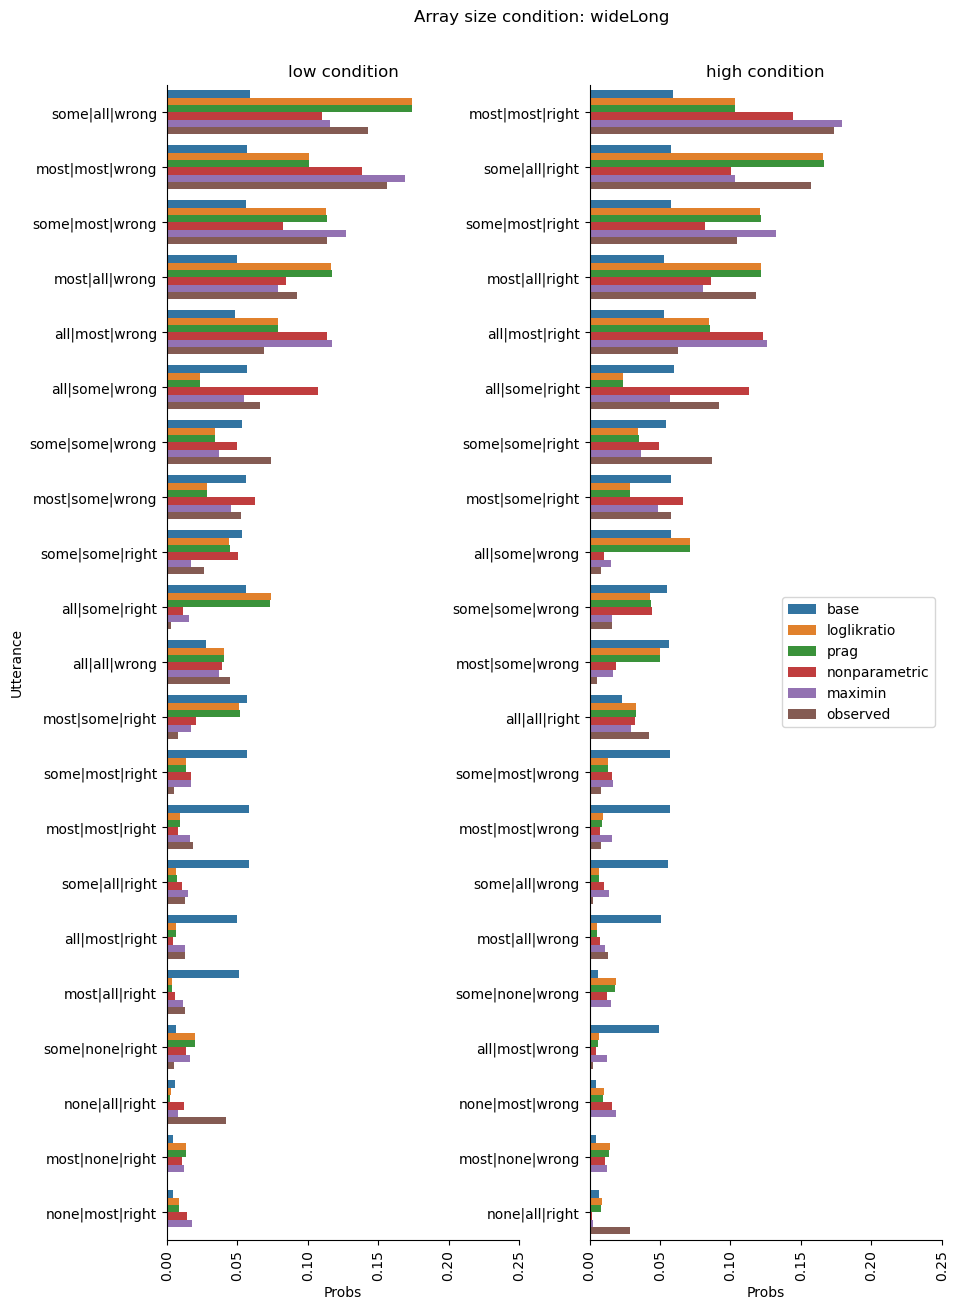

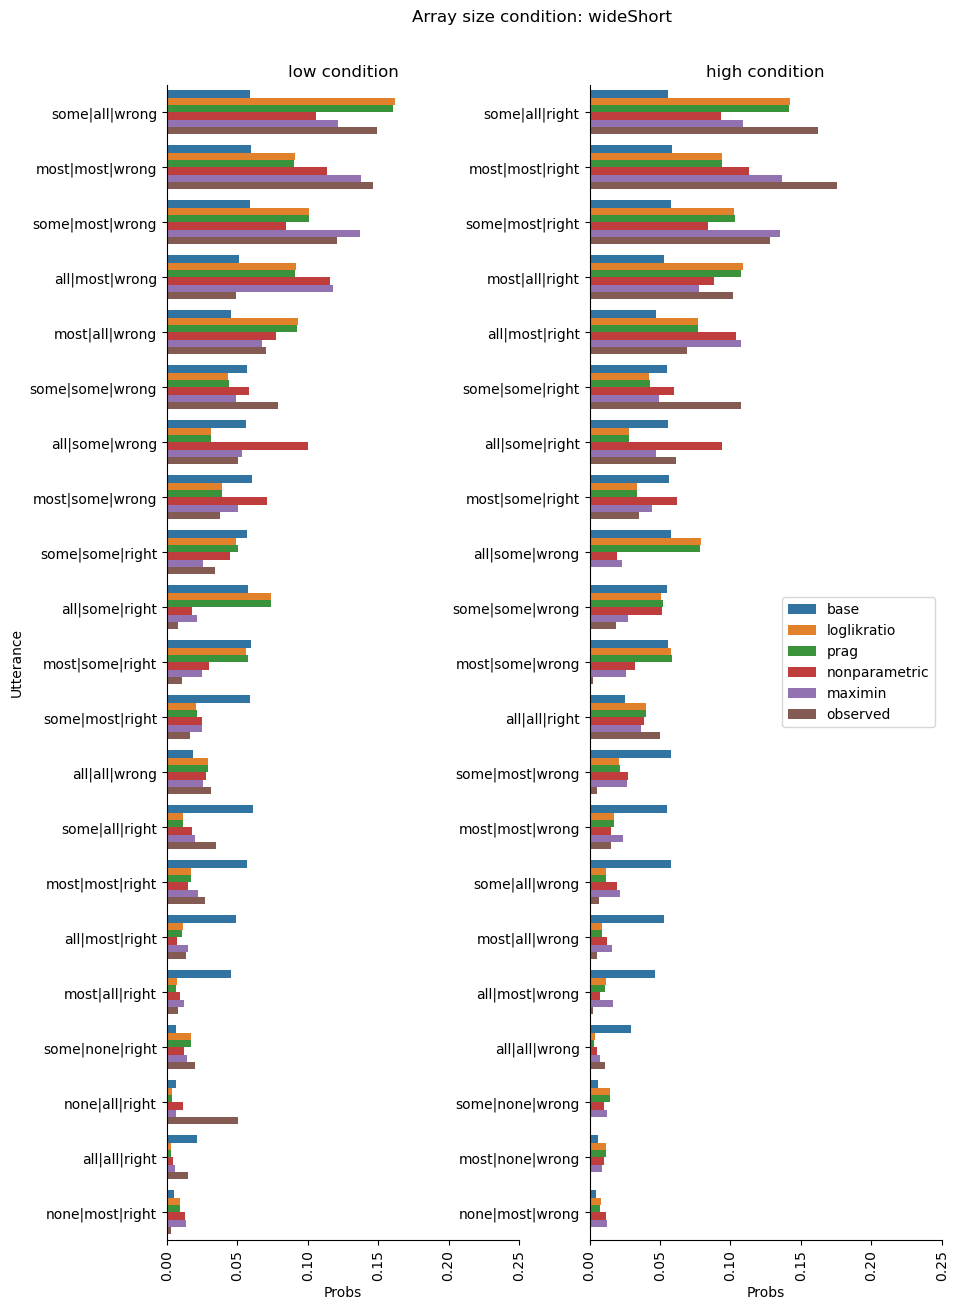

In [29]:
for i, (arrsizecond, indsi) in enumerate(data.groupby('array_size_condition').indices.items()):
    
    fig, axes = plt.subplots(
        1,2,
        figsize=(10, 15)
    )
    
    subdata = data.iloc[indsi]
    
    for j, (argcond, indsj) in enumerate(subdata.groupby('condition').indices.items()):
        
        ax = axes[j]
        
        y = (
            subdata
            .iloc[indsj]
            ['utterance']
            .value_counts(normalize=True)
        )

        x_base = (
            pps_base_hierarchical
            .iloc[indsi]
            .iloc[indsj]
            .mean(0)
        )

        x_lr = (
            pps_lr_argstrength_hierarchical
            .iloc[indsi]
            .iloc[indsj]
            .mean(0)
        )

        x_prag = (
            pps_prag_argstrength_hierarchical
            .iloc[indsi]
            .iloc[indsj]
            .mean(0)
        )

        x_nonparametric = (
            pps_nonparametric_argstrength_hierarchical
            .iloc[indsi]
            .iloc[indsj]
            .mean(0)
        )

        x_maximin = (
            pps_maximin_argstrength_hierarchical
            .iloc[indsi]
            .iloc[indsj]
            .mean(0)
        )

        toplot = (
            pd.concat(
                (x_base, x_lr, x_prag, x_nonparametric, x_maximin, y), 
                keys=['base', 'loglikratio', 'prag', 'nonparametric', 'maximin', 'observed'],
                axis=0
            )
            .reset_index()
        )
        
        # display(toplot)

        order_to_plot = (
            toplot
            .groupby('level_1')
            .mean(numeric_only=True)
            .sort_values(0, ascending=False)
            .index
        )

        sns.barplot(
            data=toplot,
            hue='level_0',
            y='level_1',
            x=0,
            order=order_to_plot,
            ax=ax,
            orient='h'
        ) 

#         # first all the ones in the first model,
#         # then all the ones in second model, etc.
#         y_coords = [p.get_y() + 0.5 * p.get_height() for p in ax.patches]
#         x_coords = [p.get_width() for p in ax.patches]

#         ax.errorbar(
#             x=x_coords, 
#             y=y_coords, 
#             xerr=0.05, 
#             fmt="none", 
#             c="k"
#         )

        ax.tick_params(axis='x', rotation=90)
        ax.set_title(f'{"high" if argcond else "low"} condition')
        ax.set_xlabel('Probs')
        ax.set_xlim(0,0.25)
        ax.set_ylim(20.5, -0.5)
        
        sns.despine(ax=ax)
        
        ax.legend(loc='center right')
        
        if j == 0:
            ax.legend().set_visible(False)
            ax.set_ylabel('Utterance')
        else:
            ax.set_ylabel('')
        
        fig.patch.set_facecolor('white')
        fig.suptitle(
            f'Array size condition: {arrsizecond}',
            y=0.93
        )

        # plt.tight_layout()

    plt.show()
    # fig.savefig(f'./figs/ppc_all_models/{obs.replace("|", "-")}_{cond}.png', dpi=300)
    plt.close(fig=fig)
    # print(i, end=' ')

# Model comparison

In [12]:
data.loc[:,'utterance'] = data['response'].apply(lambda x: '|'.join(x))

data.loc[:,'observation'] = (
    data
    ['row_number']
    .apply(lambda x: '|'.join(np.array(x).astype(str)))
)

## Pooled models

In [15]:
loo_comparison_pooled = az.compare(
    {
        'base': trace_base,
        'lr argstrength': trace_lr_argstrength,
        'maximin argstrength': trace_maximin_argstrength,
        'prag argstrength': trace_prag_argstrength,
        'nonparametric argstrength': trace_nonparametric_argstrength
    }
)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

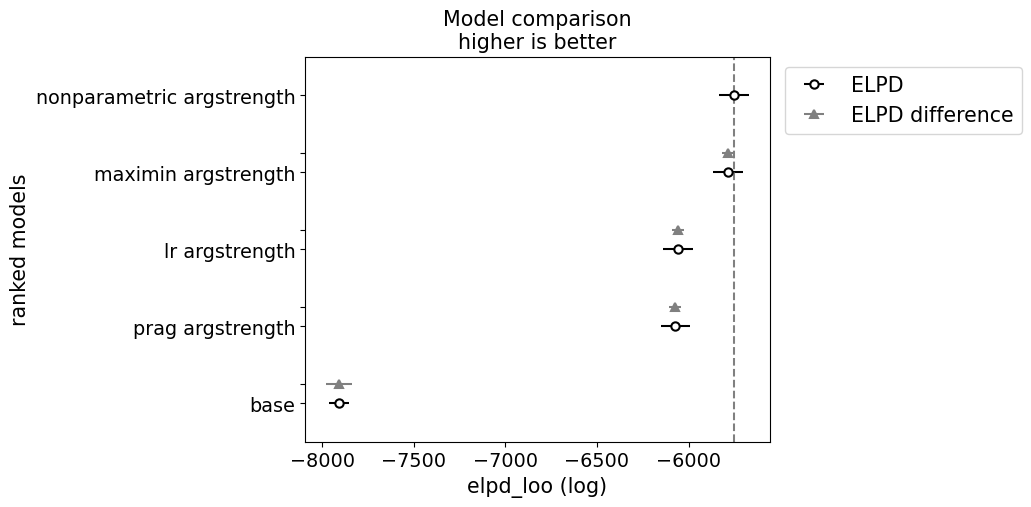

In [16]:
az.plot_compare(loo_comparison_pooled)

In [17]:
loo_comparison_pooled

rank     elpd_loo     p_loo    elpd_diff    weight  \
nonparametric argstrength     0 -5751.492268  8.898884     0.000000  0.562945   
maximin argstrength           1 -5784.454397  7.736522    32.962128  0.372536   
lr argstrength                2 -6057.245789  8.805188   305.753521  0.013096   
prag argstrength              3 -6073.191303  8.720058   321.699035  0.000000   
base                          4 -7908.407944  6.447190  2156.915676  0.051423   

                                  se        dse  warning scale  
nonparametric argstrength  80.431136   0.000000    False   log  
maximin argstrength        80.429194  31.663264    False   log  
lr argstrength             79.926400  33.924923    False   log  
prag argstrength           79.724550  34.043433    False   log  
base                       54.361088  69.379393    False   log

## Hierarchical models

In [18]:
loo_comparison_hierarchical = az.compare(
    {
        'base hierarchical': trace_base_hierarchical,
        'lr argstrength hierarchical': trace_lr_argstrength_hierarchical,
        'maximin argstrength hierarchical': trace_maximin_argstrength_hierarchical,
        'prag argstrength hierarchical': trace_prag_argstrength_hierarchical,
        'nonparametric argstrength hierarchical': trace_nonparametric_argstrength_hierarchical
    }
)

/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/faus

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

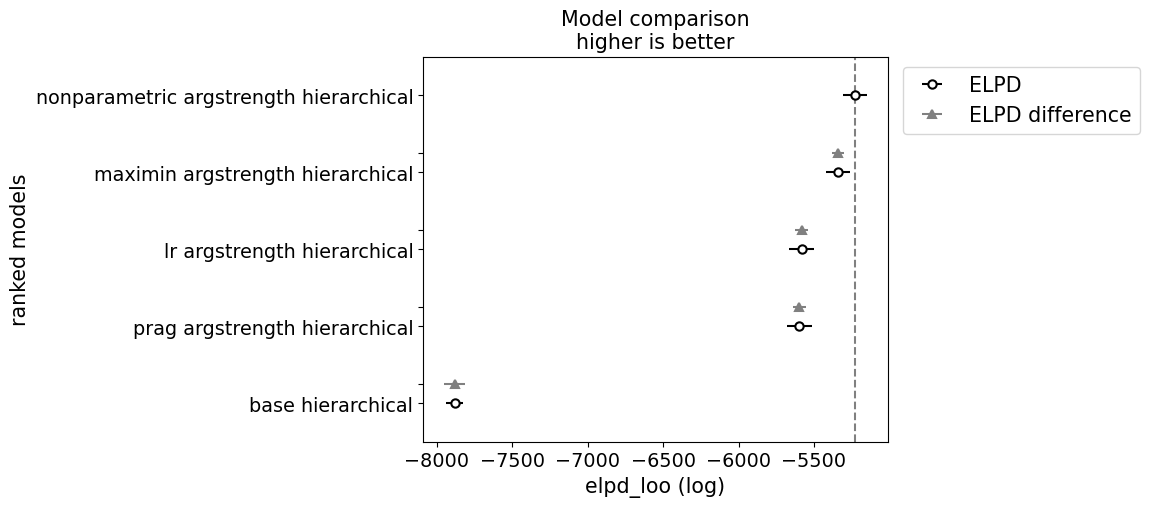

In [19]:
az.plot_compare(loo_comparison_hierarchical)

In [20]:
loo_comparison_hierarchical

rank     elpd_loo       p_loo  \
nonparametric argstrength hierarchical     0 -5229.744401  282.931285   
maximin argstrength hierarchical           1 -5339.622637  249.673527   
lr argstrength hierarchical                2 -5581.435641  294.637456   
prag argstrength hierarchical              3 -5596.165760  293.024398   
base hierarchical                          4 -7883.190488  119.429415   

                                          elpd_diff    weight         se  \
nonparametric argstrength hierarchical     0.000000  0.545408  80.469325   
maximin argstrength hierarchical         109.878235  0.292497  79.661985   
lr argstrength hierarchical              351.691240  0.153316  81.641450   
prag argstrength hierarchical            366.421359  0.000000  81.480474   
base hierarchical                       2653.446087  0.008779  54.577591   

                                              dse  warning scale  
nonparametric argstrength hierarchical   0.000000     True   log  
maximin argstrength hierarchical        38.682570     True   log  
lr argstrength hierarchical             44.248872     True   log  
prag argstrength hierarchical           44.290329     True   log  
base hierarchical                       68.572058     True   log

In [22]:
loo_base_hierarchical = az.loo(
    trace_base_hierarchical,
    pointwise=True
)
loo_lr_argstrength_hierarchical = az.loo(
    trace_lr_argstrength_hierarchical,
    pointwise=True
)
loo_maximin_argstrength_hierarchical = az.loo(
    trace_maximin_argstrength_hierarchical,
    pointwise=True
)
loo_prag_argstrength_hierarchical = az.loo(
    trace_prag_argstrength_hierarchical,
    pointwise=True
)
loo_nonparametric_argstrength_hierarchical = az.loo(
    trace_nonparametric_argstrength_hierarchical,
    pointwise=True
)

/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/faus

## Maximin vs nonparametric

In [23]:
# where it's positive, maximin is better than nonparametric
# where it's negative, other way around
maximin_vs_nonparametric = (
    loo_maximin_argstrength_hierarchical.loo_i 
    - loo_nonparametric_argstrength_hierarchical.loo_i
).values.flatten()

data.loc[:,'maximin_vs_nonparametric'] = maximin_vs_nonparametric

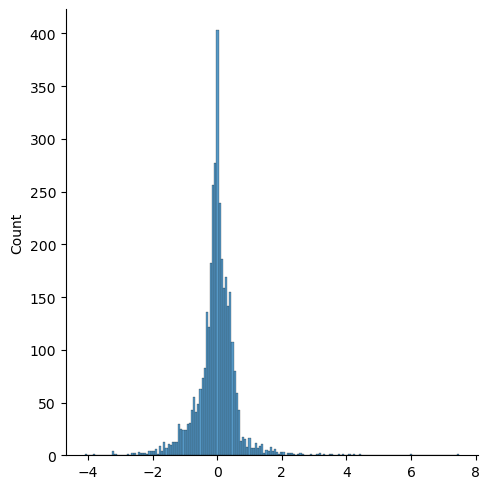

In [24]:
sns.displot(maximin_vs_nonparametric)

<Axes: xlabel='array_size_condition', ylabel='maximin_vs_nonparametric'>

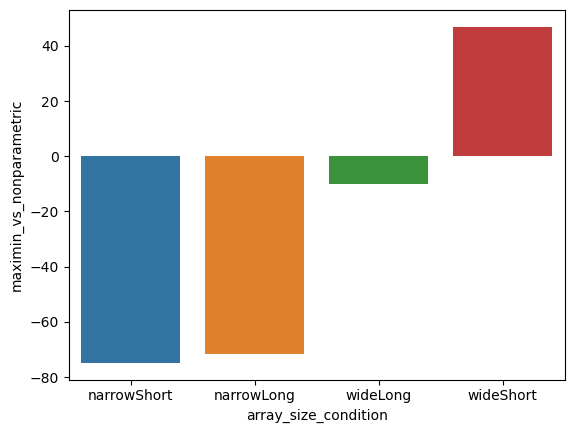

In [25]:
fig, ax = plt.subplots()
sns.barplot(
    data=data.groupby(['array_size_condition']).agg({
        'maximin_vs_nonparametric': 'sum'
    }).reset_index().sort_values('maximin_vs_nonparametric'),
    x='array_size_condition',
    y='maximin_vs_nonparametric',
    ax=ax
)
# ax.tick_params(axis='x', rotation=90)

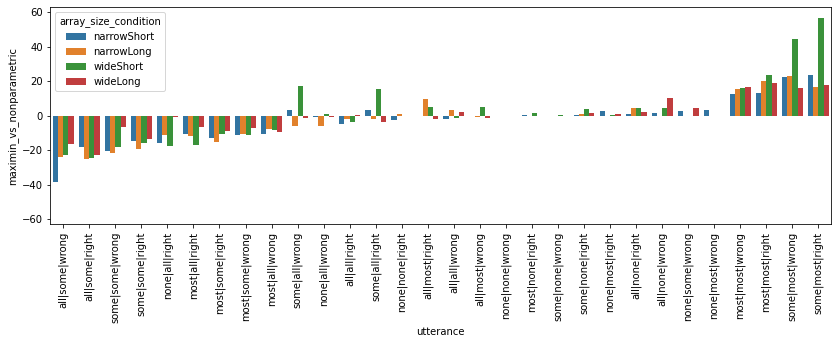

In [210]:
fig, ax = plt.subplots(figsize=(14,4))
sns.barplot(
    data=data.groupby(['utterance', 'array_size_condition']).agg({
        'maximin_vs_nonparametric': 'sum'
    }).reset_index().sort_values('maximin_vs_nonparametric'),
    x='utterance',
    y='maximin_vs_nonparametric',
    hue='array_size_condition',
    ax=ax
)
ax.set_ylim(-63, 63)
ax.tick_params(axis='x', rotation=90)

(-16.0, 16.0)

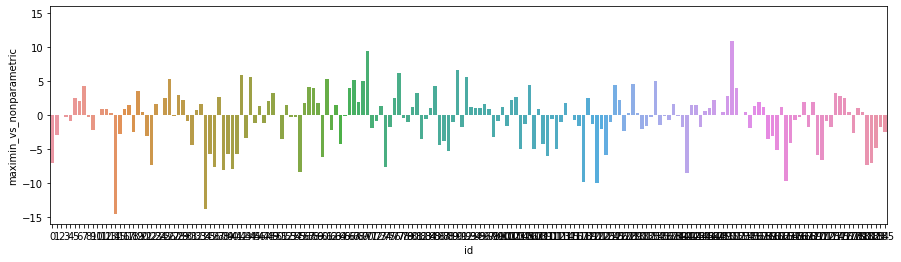

In [181]:
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(
    data=data.groupby(['id']).agg({
        'maximin_vs_nonparametric': 'sum'
    }).reset_index().sort_values('maximin_vs_nonparametric'),
    x='id',
    y='maximin_vs_nonparametric',
    ax=ax
)
# ax.tick_params(axis='x', rotation=90)
ax.set_ylim(-16, 16)

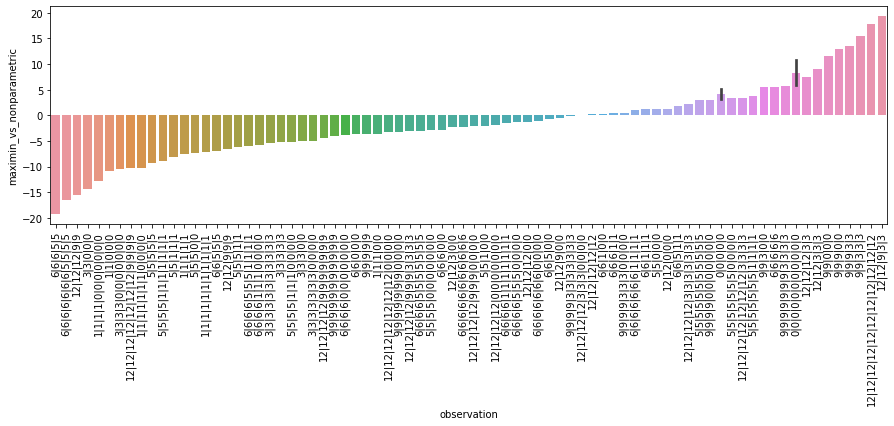

In [179]:
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(
    data=data.groupby(['observation', 'array_size_condition']).agg({
        'maximin_vs_nonparametric': 'sum'
    }).reset_index().sort_values('maximin_vs_nonparametric'),
    x='observation',
    y='maximin_vs_nonparametric',
    ax=ax
)
ax.tick_params(axis='x', rotation=90)

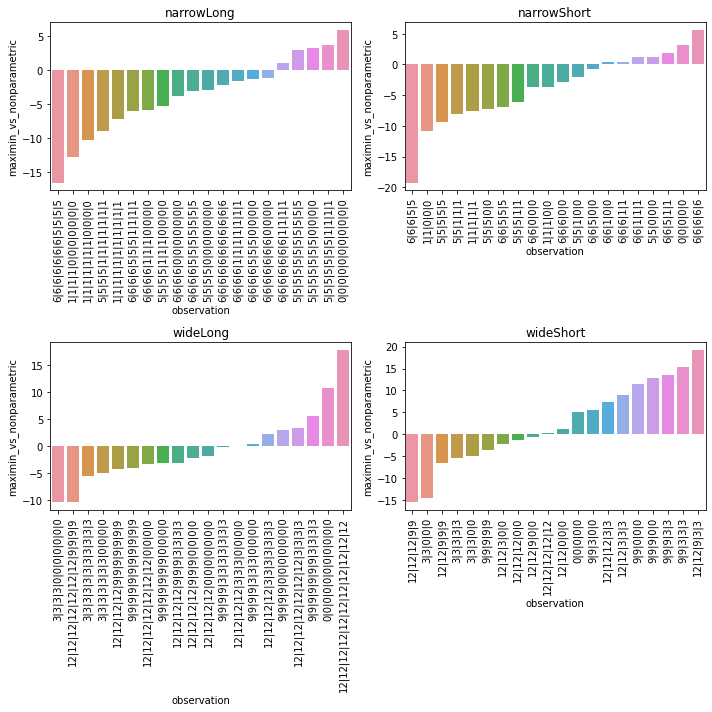

In [195]:
fig, axes = plt.subplots(
    2,2,
    figsize=(10,10)
)

for ax,(cond,subp) in zip(axes.flatten(), data.groupby(['array_size_condition'])):
    subpg = subp.groupby('observation').agg({
        'maximin_vs_nonparametric': 'sum'
    }).reset_index().sort_values('maximin_vs_nonparametric')
    
    sns.barplot(
        data=subpg,
        x='observation',
        y='maximin_vs_nonparametric',
        ax=ax
    )
    ax.set_title(cond)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

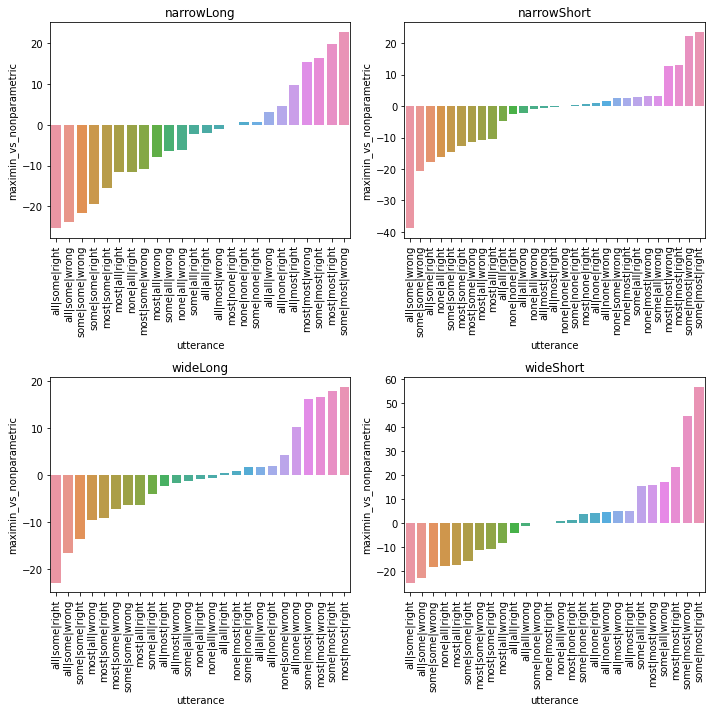

In [211]:
fig, axes = plt.subplots(
    2,2,
    figsize=(10,10)
)

for ax,(cond,subp) in zip(axes.flatten(), data.groupby(['array_size_condition'])):
    subpg = subp.groupby('utterance').agg({
        'maximin_vs_nonparametric': 'sum'
    }).reset_index().sort_values('maximin_vs_nonparametric')
    
    sns.barplot(
        data=subpg,
        x='utterance',
        y='maximin_vs_nonparametric',
        ax=ax
    )
    ax.set_title(cond)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

## Base vs lr

In [199]:
# where it's positive, maximin is better than nonparametric
# where it's negative, other way around
base_vs_lr = (
    loo_base_hierarchical.loo_i 
    - loo_lr_argstrength_hierarchical.loo_i
).values.flatten()

data.loc[:,'base_vs_lr'] = base_vs_lr

# Analysis of conditions separately

In [134]:
def run_analyses_condition(condition_name, folder_exp2_traces):
    
    print('Getting data for condition', condition_name)
    
    _, data, list_possible_observations, possible_utterances = get_and_clean_data(
        pathdata_firstexp='../arglang_exp/data_experiment1/data.csv',
        pathdata='../arglang_exp/data_experiment2/data.csv',
        select_condition=condition_name
    )

    # Participants remaining after exclusion
    print(data['id'].unique().shape)
        
    names = [
        'base', 
        'lr_argstrength', 
        'maximin_argstrength', 
        'prag_argstrength', 
        'nonparametric_argstrength'
    ]
    
    models_factories = [
        factory_model_base,
        factory_model_lr_argstrength,
        factory_model_maximin_argstrength,
        factory_model_prag_argstrength,
        factory_model_nonparametric_argstrength
    ]
    
    for name, factory_f in zip(names, models_factories):
        
        model = factory_f(
            data, 
            list_possible_observations, 
            possible_utterances
        )
        
        if isfile(folder_exp2_traces + f'/{name}_{condition_name}/trace.nc'):
            print('Trace file found')
            # trace = load_trace(
            #     f'{name}_{condition_name}',
            #     folder_exp2_traces
            # )['trace']
            # display(trace)
            
        else:
            print(f'Sampling for model {name} in condition {condition_name}')
            print(model)
            
            with model:
                trace = pm.sample(
                    draws=1000,
                    tune=1000,
                    target_accept=0.95,
                    return_inferencedata=True,
                )

            # run with argument strength calculated just using
            # the possible observations in the experiment
            az.plot_trace(trace)
            plt.suptitle(name)
            plt.tight_layout()
            plt.show()

            save_trace(
                name+'_'+condition_name, 
                trace,
                path_to_folder=folder_exp2_traces
            )

In [124]:
folder_exp2_traces = (
    '/mnt/c/Users/faust/Documents/'
    'arglang_model_fitting/experiment2_traces'
)

In [130]:
folder_exp2_traces

'/mnt/c/Users/faust/Documents/arglang_model_fitting/experiment2_traces'

In [131]:
condnames = ['wideShort', 'narrowLong', 'narrowShort', 'wideLong']

In [135]:
for cond in condnames:
    run_analyses_condition(cond, folder_exp2_traces)

Getting data for condition wideShort
0  were excluded because incompletely recorded
4  of the participants were excluded as they gave more than 4 false responses
48  of the observations in the included participants were excluded because literally false
(76,)
Defining non-hierarchical model


/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found


/tmp/ipykernel_24909/2530685981.py:65: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Getting data for condition narrowLong
0  were excluded because incompletely recorded
5  of the participants were excluded as they gave more than 4 false responses
24  of the observations in the included participants were excluded because literally false
(35,)
Defining non-hierarchical model


/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found


/tmp/ipykernel_24909/2530685981.py:65: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Getting data for condition narrowShort
0  were excluded because incompletely recorded
4  of the participants were excluded as they gave more than 4 false responses
20  of the observations in the included participants were excluded because literally false
(36,)
Defining non-hierarchical model


/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found


/tmp/ipykernel_24909/2530685981.py:65: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Getting data for condition wideLong
0  were excluded because incompletely recorded
1  of the participants were excluded as they gave more than 4 false responses
21  of the observations in the included participants were excluded because literally false
(39,)
Defining non-hierarchical model


/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/fausto/anaconda3/envs/argumentative_language/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model


/tmp/ipykernel_24909/2530685981.py:65: RuntimeWarning: invalid value encountered in subtract
  return np.nanmin(logp_for-logp_against, 1)


Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found
Defining non-hierarchical model
Defining non-hierarchical model
Trace file found


In [136]:
traces = get_traces(folder_exp2_traces)

Getting  base
Objects for base not yet defined, attempting from file
Objects for base loaded from file

Getting  base_hierarchical
Objects for base_hierarchical not yet defined, attempting from file
Objects for base_hierarchical loaded from file

Getting  base_narrowLong
Objects for base_narrowLong not yet defined, attempting from file
Objects for base_narrowLong loaded from file

Getting  base_narrowShort
Objects for base_narrowShort not yet defined, attempting from file
Objects for base_narrowShort loaded from file

Getting  base_wideLong
Objects for base_wideLong not yet defined, attempting from file
Objects for base_wideLong loaded from file

Getting  base_wideShort
Objects for base_wideShort not yet defined, attempting from file
Objects for base_wideShort loaded from file

Getting  lr_argstrength
Objects for lr_argstrength not yet defined, attempting from file
Objects for lr_argstrength loaded from file

Getting  lr_argstrength_hierarchical
Objects for lr_argstrength_hierarchical 

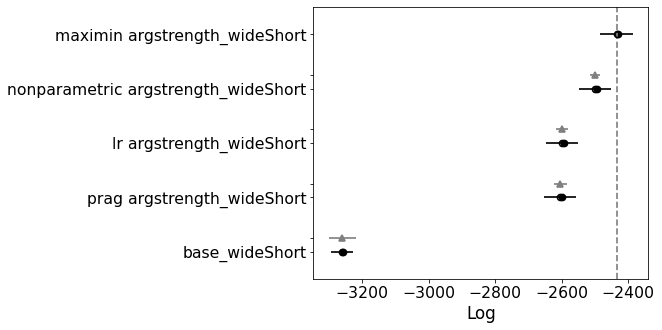

rank          loo     p_loo       d_loo  \
maximin argstrength_wideShort           0 -2434.932068  2.846217    0.000000   
nonparametric argstrength_wideShort     1 -2499.375351  4.097933   64.443283   
lr argstrength_wideShort                2 -2598.606898  4.221687  163.674830   
prag argstrength_wideShort              3 -2604.285005  4.503406  169.352937   
base_wideShort                          4 -3259.636087  2.301483  824.704019   

                                           weight         se        dse  \
maximin argstrength_wideShort        8.314527e-01  49.325839   0.000000   
nonparametric argstrength_wideShort  1.053158e-01  47.671404  14.218472   
lr argstrength_wideShort             1.005722e-10  47.733076  18.559209   
prag argstrength_wideShort           1.020434e-10  47.564376  18.843146   
base_wideShort                       6.323149e-02  32.605495  40.801781   

                                     warning loo_scale  
maximin argstrength_wideShort          False       log  
nonparametric argstrength_wideShort    False       log  
lr argstrength_wideShort               False       log  
prag argstrength_wideShort             False       log  
base_wideShort                         False       log

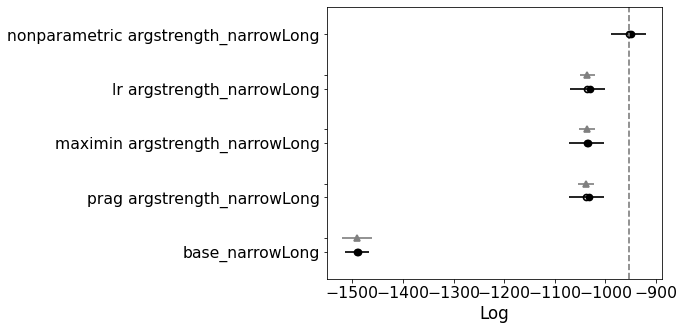

rank          loo     p_loo       d_loo  \
nonparametric argstrength_narrowLong     0  -954.302016  4.400956    0.000000   
lr argstrength_narrowLong                1 -1035.651239  4.747957   81.349223   
maximin argstrength_narrowLong           2 -1036.967609  2.697520   82.665593   
prag argstrength_narrowLong              3 -1038.056375  4.685794   83.754359   
base_narrowLong                          4 -1490.124958  2.473310  535.822942   

                                            weight         se        dse  \
nonparametric argstrength_narrowLong  8.914699e-01  34.854765   0.000000   
lr argstrength_narrowLong             9.380750e-03  34.712953  15.462804   
maximin argstrength_narrowLong        6.171617e-02  34.814005  16.085797   
prag argstrength_narrowLong           7.680499e-15  34.686835  15.534981   
base_narrowLong                       3.743318e-02  23.395073  30.165096   

                                      warning loo_scale  
nonparametric argstrength_narrowLong    False       log  
lr argstrength_narrowLong               False       log  
maximin argstrength_narrowLong          False       log  
prag argstrength_narrowLong             False       log  
base_narrowLong                         False       log

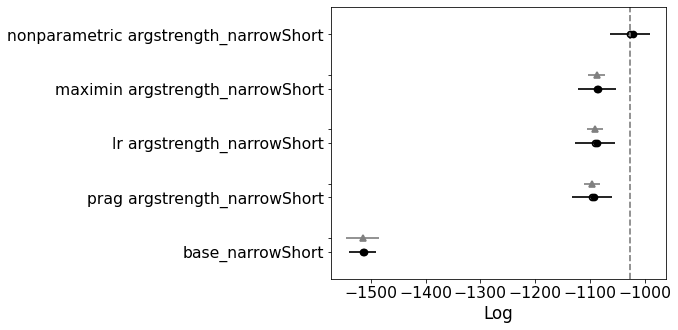

rank          loo     p_loo  \
nonparametric argstrength_narrowShort     0 -1025.870949  4.301283   
maximin argstrength_narrowShort           1 -1087.076153  2.790587   
lr argstrength_narrowShort                2 -1090.095923  4.173032   
prag argstrength_narrowShort              3 -1095.925058  4.207527   
base_narrowShort                          4 -1514.951159  2.399484   

                                            d_loo    weight         se  \
nonparametric argstrength_narrowShort    0.000000  0.808215  36.602912   
maximin argstrength_narrowShort         61.205204  0.148510  35.086411   
lr argstrength_narrowShort              64.224974  0.000000  36.223579   
prag argstrength_narrowShort            70.054109  0.000000  36.078623   
base_narrowShort                       489.080210  0.043274  25.031093   

                                             dse  warning loo_scale  
nonparametric argstrength_narrowShort   0.000000    False       log  
maximin argstrength_narrowShort        15.633995    False       log  
lr argstrength_narrowShort             14.268721    False       log  
prag argstrength_narrowShort           14.388408    False       log  
base_narrowShort                       30.252345    False       log

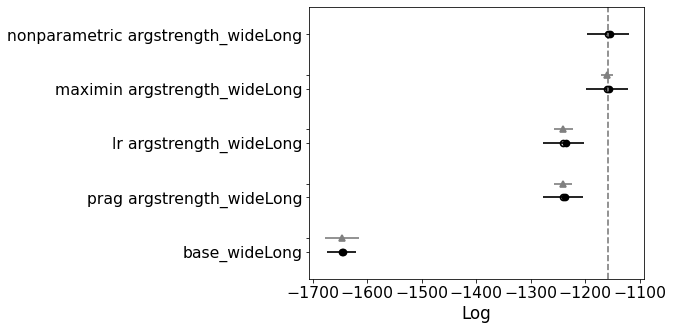

rank          loo     p_loo       d_loo  \
nonparametric argstrength_wideLong     0 -1158.578304  4.379244    0.000000   
maximin argstrength_wideLong           1 -1159.738646  2.703477    1.160342   
lr argstrength_wideLong                2 -1239.864677  4.523036   81.286373   
prag argstrength_wideLong              3 -1240.696770  4.260437   82.118466   
base_wideLong                          4 -1646.595133  2.336667  488.016829   

                                          weight         se        dse  \
nonparametric argstrength_wideLong  5.107450e-01  38.667930   0.000000   
maximin argstrength_wideLong        4.045154e-01  38.686883  10.916738   
lr argstrength_wideLong             3.453378e-02  37.188506  16.665593   
prag argstrength_wideLong           2.822383e-16  37.133555  16.668547   
base_wideLong                       5.020581e-02  26.737797  31.364518   

                                    warning loo_scale  
nonparametric argstrength_wideLong    False       log  
maximin argstrength_wideLong          False       log  
lr argstrength_wideLong               False       log  
prag argstrength_wideLong             False       log  
base_wideLong                         False       log

In [138]:
for condname in condnames:
    
    loo_comparison = az.compare(
        {
            f'base_{condname}': traces[f'base_{condname}'],
            f'lr argstrength_{condname}': traces[f'lr_argstrength_{condname}'],
            f'maximin argstrength_{condname}': traces[f'maximin_argstrength_{condname}'],
            f'prag argstrength_{condname}': traces[f'prag_argstrength_{condname}'],
            f'nonparametric argstrength_{condname}': traces[f'nonparametric_argstrength_{condname}']
        }
    )
    
    az.plot_compare(loo_comparison)
    plt.show()
    display(loo_comparison)

# PPP-value for best fitting model

In [ ]:
trace_nonparametric_argstrength_hierarchical

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [23]:
from functions.helper_functions import calculate_bayesian_posterior_pvalue

In [26]:
with model_nonparametric_argstrength_hierarchical:
    pps = pm.sample_posterior_predictive(
        trace_nonparametric_argstrength_hierarchical
    )

In [29]:
bppv = calculate_bayesian_posterior_pvalue(
    trace_nonparametric_argstrength_hierarchical, 
    pps['utterances'],
    model_nonparametric_argstrength_hierarchical, 
    return_full=False, 
    pointwise=False
)

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 

In [30]:
bppv

0.40775